<a href="https://colab.research.google.com/github/cardoso20191/data-driven-insights/blob/main/data_driven_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Projeto - Data-Drive Insights (Mód.01)
## 📶Análise Exploratória - Estudante de Matemática

####⚠️ 1. Instalando as Bibliotecas necessárias para uso na análise.
Pandas, Numpy e matplotli.pysplot

In [1]:
#Instalando o Pandas
%pip install pandas

In [2]:
#Instalando o Numpy
%pip install Numpy

In [4]:
#Instalando o matplotlib.pyplot
%pip install matplotlib

### 🐼2. Importando as bibliotecas bases  para o projeto
(Pandas, Numpy e Matplotlib.pyplot)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###📊3. Carregamento da Base a partir do arquivo disponibilizado no ambiente do Colab
####Base extraida do site: https://archive.ics.uci.edu/dataset/320/student+performance - arquivo (student-mat)

In [7]:
df = pd.read_csv('student-mat.csv', sep=';') #A fnção sep está sendo usada para informar que o separador do data set é ";"

####4. Para realizar uma boa análise é importante conhecer a base, abaixo iremos conhecer a estrutura de nosso data set a partir das funções head(), shape, columns, e dtypes.
O objetivo e podermos ter uma visão do que temos para realizar nossa análise exploratória e obter insights.

In [46]:
print(df.head()) #Função utilizada para apresentar o cabeçalho por padrão ele retorna as 5 primeiras linhas.

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 Diferenca  
0        3     4     1     1       3        6   5   6   6        -1  
1        3     3     1     1       3        4   5   5   6        -1  
2        3     2     2     3       3       10   7   8  10        -3  
3        2     2     1     1       5        2  15  14  15         0  
4        3     2     1     2       5        4   6  10  10        -4  

[5 rows x 34 columns]


In [9]:
print(df.shape) # A função shape nos retorna o total de linhas e colunas nosso data set possui

(395, 33)


In [10]:
#print(df.columns) #A função columns nos retorna o nome das colunas do data set

for col in df.columns:
  print(col)

school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
G3


In [11]:
print(df.dtypes)
#A função dtypes nos retorna o tipo de dado de cada coluna,
#Identificamos que as notas atribuidas são apenas do tipo int, com isso um aluno sómente recebe uma nota 1 a 10 exclusivamente.

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


# 4.1. Listas, Dicionários e Tuplas
Obtendo os primeiros insights

In [14]:
# Lista: Coluna de texto/categórica
##Extraido uma coluna de interesse em uma lista Python e realizado um loop imprimindo informações sobre cada item.

failures = list(df['failures'])
for failure in failures[:10]:
    print(f"Quantidade de Repovações:{failure}")

Quantidade de Repovações: 0
Quantidade de Repovações: 0
Quantidade de Repovações: 3
Quantidade de Repovações: 0
Quantidade de Repovações: 0
Quantidade de Repovações: 0
Quantidade de Repovações: 0
Quantidade de Repovações: 0
Quantidade de Repovações: 0
Quantidade de Repovações: 0


In [22]:
# Dicionário: chave e valor, exemplo (nome:categoria)
# Dicionário relacionando dois campos importantes da base (ex: produto:categoria, filme:gênero, aluno:disciplina) e exiba 3 pares.
# Como as chaves em um dicionário são únicas, se houver repetição (como 0 ou 1 mais de uma vez), o último valor substitui os anteriores.
# Por este motivo mesmo solicitando todas as linhas, note que não imprime todas, a alternativa seria usar uma lista de tuplas

dicionario = dict(zip(df['failures'][:395], df['sex'][:395]))
print(dicionario)

{0: 'M', 3: 'M', 2: 'M', 1: 'F'}


In [26]:
# Tupla: informações de uma linha, aqui podemos visualizar os mesmo dados anteriores repetido mesmo tendo valores repetidos.

linha20 = df.iloc[20] #Nesta tupla estamos usando a função 'iloc' para informar a linha que queremos imprimir  a partir do indice '20'
minha_tupla = (linha20['failures'], linha20['sex'], linha20['absences']) # Sendo assim irá imprimir os dados das colunas "failures", "sex" e "absences"
print(minha_tupla)

(np.int64(0), 'M', np.int64(0))


#4.2. Estruturas Condicionais e Laços

In [32]:
# Utilizando (if/elif/else) para saber se a partir de um indice o aluno pode ser considerado reprovado se absences >= 8, em recuparação se absences >7 e aprovado se não atender aos criterios.

absences = 'absences'
primeiro_valor = df[absences][2] #A partir de um indice para avaliar a situação do aluno a partir da frequência (absences)

if primeiro_valor > 8 :
    print("Reprovado")
elif primeiro_valor > 7:
    print("Recuperação")
else:
    print("Aprovado")

Aprovado


In [35]:
# Utilizando For para operar sobre n primeiros elementos de uma coluna numérica escolhida
soma = 0
lista = list(df[absences][:395]) #Somando o total de faltas de todos os alunos
for n in lista:
    soma += n
print("Soma de todas as ausencias:", soma)

Soma de todas as ausencias: 2255


In [43]:
# Utilizando While para encontrar o primeiro valor maior que um certo limite, definido de acordo com os dados

limite = 6
i = 0
while i < len(lista) and lista[i] <= limite:
    i += 1
if i < len(lista):
    print("Primeiro valor >", limite, "encontrado:", lista[i])
else:
    print("Nenhum valor maior que", limite, "encontrado nos primeiros 5.")

Primeiro valor > 6 encontrado: 10


4.3. Operadores Aritméticos e Manipulação de Dados

In [45]:
#Calculando a diferença entre a primeira nota G1 e a terceira G3.
if 'G1' in df.columns and 'G3' in df.columns:
    df['Diferenca'] = df['G1'] - df['G3']
    print(df[['G1', 'G3', 'Diferenca']].head())

   G1  G3  Diferenca
0   5   6         -1
1   5   6         -1
2   7  10         -3
3  15  15          0
4   6  10         -4


In [47]:
# Exemplo: ausencias com desconto, considerando possível realização de trabalhos para compensar faltas.

if 'absences' in df.columns:
    df['Desconto'] = df['absences'] * 0.9
    print(df[['absences', 'Desconto']].head())

   absences  Desconto
0         6       5.4
1         4       3.6
2        10       9.0
3         2       1.8
4         4       3.6


#5. NumPy e Arrays Numéricos

In [71]:
# Crie um array NumPy a partir de uma coluna numérica da base.
# Realize pelo menos duas operações vetorizadas com esse array (ex: somar, multiplicar, elevar ao quadrado elementos).
# Mostre como acessar, modificar e exibir partes do array (fatiamento/slicing ou indexação).
# Mostre como fazer uma operação agregada, como soma ou média, sobre o array.#

array = np.array(df['absences'])

# Operações NumPy
array_somado = array + 10
array_quadrado = array ** 2

print(array[:5])
print(array_somado[:5])
print(array_quadrado[:5])

print("Soma dos elementos:", array.sum())
print("Média dos elementos:", round(array.mean(),1)) #Utilizado o round para limitar as casas decimais.

[ 6  4 10  2  4]
[16 14 20 12 14]
[ 36  16 100   4  16]
Soma dos elementos: 2255
Média dos elementos: 5.7


#6. Acesso e Manipulação de Dados com Pandas
* Selecione linhas/colunas específicas usando .loc, .iloc ou filtrando por condição.
* Use algum método de pandas para contar ou agrupar informações simples (ex: .value_counts(), .groupby()), mostrando o resultado em Markdown.
* Crie uma pequena análise agregada interessante (ex: número de filmes por país, quantidade de alunos por escola, vendas por categoria).

In [52]:
# Selecione linhas/colunas específicas usando .loc, .iloc ou filtrando por condição. Assim podemos visualizar as ausências baseado em sexo e idade
absences = df.loc[df['absences'] > 8, ['sex', 'age']]
print(f"Ausências - Sexo x Idade: {absences}")

Ausências - Sexo x Idade:     sex  age
2     F   15
5     M   16
18    M   17
25    F   16
29    M   16
..   ..  ...
369   F   18
373   F   17
379   F   17
384   M   18
390   M   20

[86 rows x 2 columns]


#7. Visualização de Dados
* Obrigatório gerar pelo menos 1 gráfico de cada tipo básico:
 * Gráfico de Linha: ilustrando tendências/séries temporais quando possível.
  * Gráfico de Barras: comparando categorias relevantes.
  * Gráfico de Dispersão: mostrando a relação entre duas variáveis numéricas.
* Se algum dos gráficos não for aplicável à sua base, crie (ou simule) dados para mostrar que compreendeu o recurso.
* Para cada gráfico, escreva em Markdown um comentário sobre o que ele mostra.

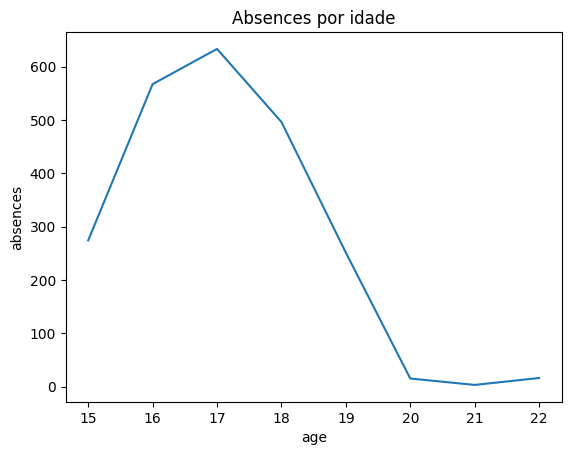

In [72]:
# Gráfico de Linha (ex: evolução temporal; use 'Data' se houver)
if 'age' in df.columns and 'absences' in df.columns:
    df.groupby('age')['absences'].sum().plot(kind='line')
    plt.title('Absences por idade')
    plt.xlabel('age')
    plt.ylabel('absences')
    plt.show()

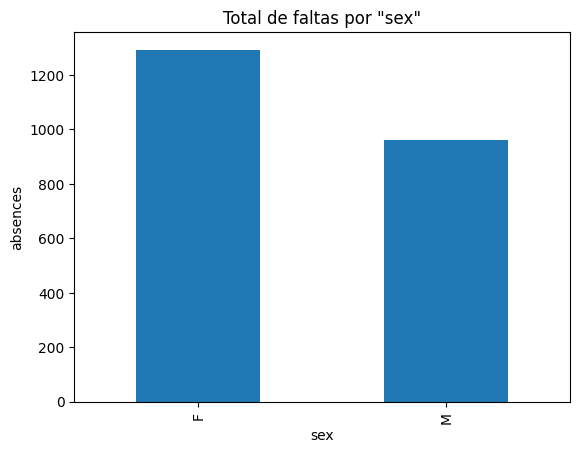

In [61]:
# Gráfico de Barras (categorias)
if 'sex' in df.columns and 'absences' in df.columns:
    df.groupby('sex')['absences'].sum().plot(kind='bar')
    plt.title('Total de faltas por "sex"')
    plt.xlabel('sex')
    plt.ylabel('absences')
    plt.show()

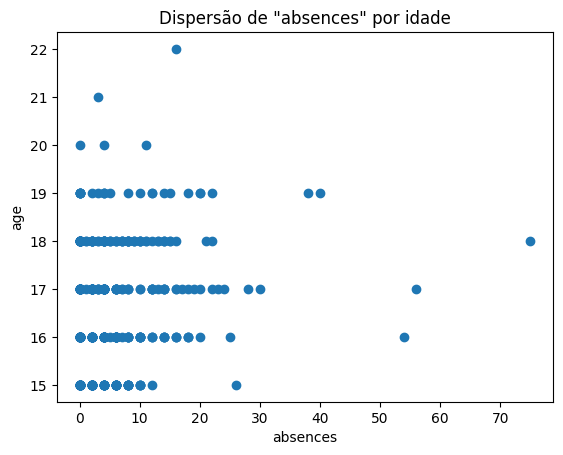

In [66]:
# Gráfico de Dispersão (duas numéricas)
if 'absences' in df.columns and 'age' in df.columns:
    plt.scatter(df['absences'], df['age'])
    plt.title('Dispersão de "absences" por idade')
    plt.xlabel('absences')
    plt.ylabel('age')
    plt.show()